**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. What are Regular Expressions?
2. How Do Regular Expressions Work?
3. What is raw string?
4. How to check if a certain pattern is in a string?
5. Common Regex Functions used in NLP

**-----------------------------------------------------------------------------------------------------------------**

# 2.4 Regular Expressions

Regular expressions, or "regex" for short, is a special syntax for searching for strings that meets a specified pattern. It's a great tool to filter and sort through text when you want to match patterns rather than a hard coded string or strings.

There are loads of options for the syntax so it's best to just jump in and get started with some examples.

**Definition:** Regular expressions or RegEx is defined as a sequence of characters that are mainly used to find or replace patterns present in the text. In simple words, we can say that a regular expression is a set of characters or a pattern that is used to find substrings in a given string.

Sometimes, we want to identify the different components of an email address.

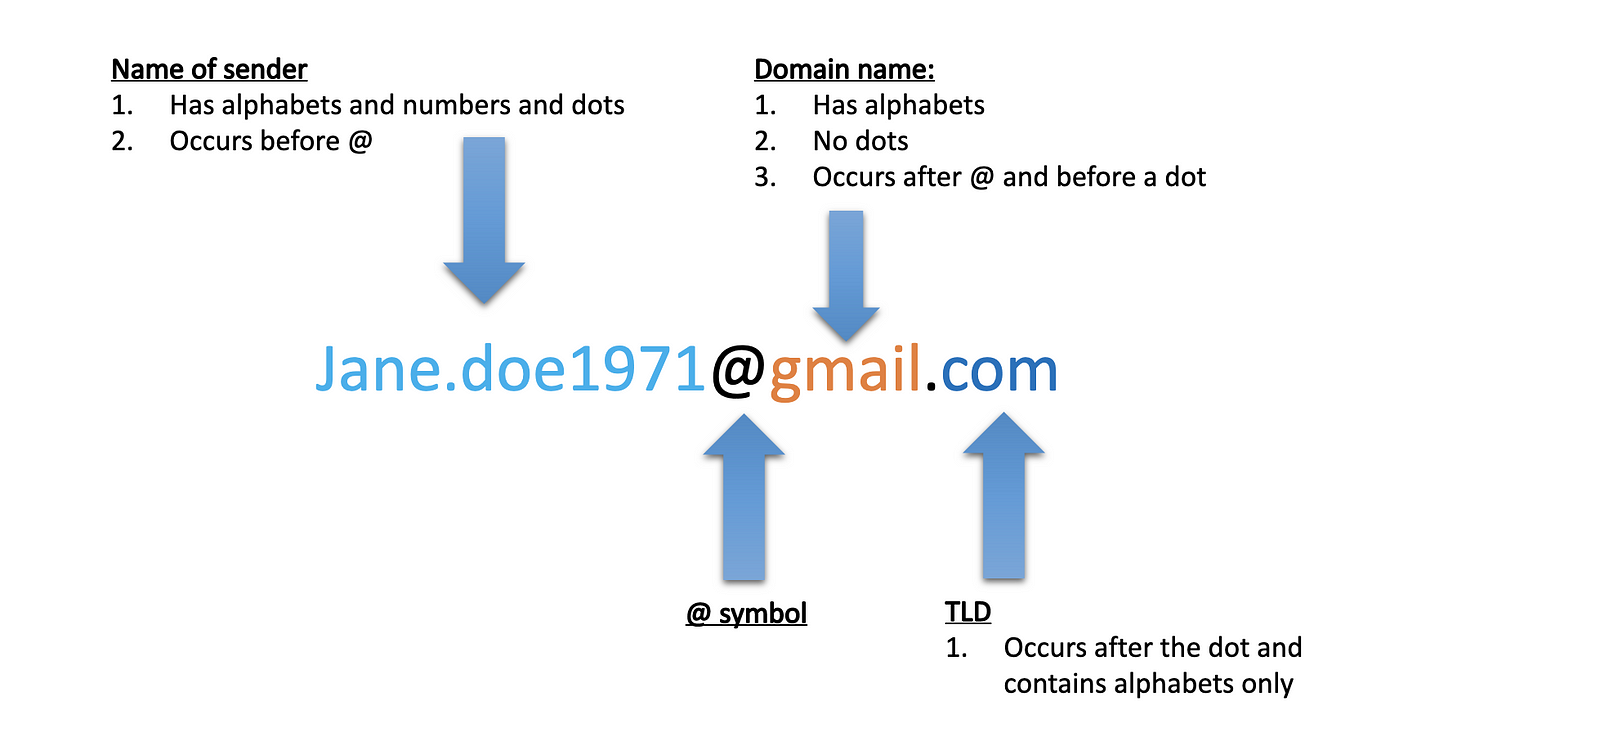

*Regular Expressions are used in various tasks such as,*

Data pre-processing,

Rule-based information Mining systems,

Pattern Matching,

Text feature Engineering,

Web scraping,

Data Extraction, etc.

In [1]:
import re

## Raw Strings

Python recognises certain characters to have a special meaning, for example, \n in python is used to indicate a new line. However, sometimes these codes that python recognises to have certain meanings appear in our strings and we want to tell python that a \n in our text is a literal \n, rather than meaning a new line.

We can use the 'r' character before strings to indicate to python that our text is what is known as a "raw string".

In [2]:
# print text without using raw string indicator
my_folder = "C:\desktop\notes"
print(my_folder)

C:\desktop
otes


See how the python interprets the \n to mean a new line! Now let's try it as a raw string...

In [3]:
# include raw string indicator
my_folder = r"C:\desktop\notes"
print(my_folder)

C:\desktop\notes


The folder path is now printed as we wanted. This is important to keep in mind when working with regular expressions as we'll want to make sure we are using raw strings when working with special characters. It's also just a good habit to get into when working with strings and regular expressions so you don't get caught out!

## re.search

re.search is a function which allows us to check if a certain pattern is in a string. It uses the logic re.search("pattern to find", "string to find it in"). It will return the pattern if it is found in the string, or else it will return None if the pattern is not found.

In [5]:
result_search = re.search("pattern", r"Sachin string containing the pattern")
print(result_search)

<re.Match object; span=(29, 36), match='pattern'>


In [6]:
print(result_search.group()) # returns just the matching pattern

pattern


In [7]:
result_search = re.search("pattern",r"the phrase to find isn't in this string")
print(result_search) # returns None

None


## re.sub

re.sub allows us to find certain text and replace it. It uses the logic re.sub("pattern to find", "replacement text", "string").

In [8]:
string = r"sara was able to help me find the items i needed quickly"

In [11]:
new_string = re.sub(r"sara", r"sarahpppppppp", string) # replace the incorrect spelling of sarah
print(new_string)

sarahpppppppp was able to help me find the items i needed quickly


## Regex Syntax

The real power of regex is being able to leverage the syntax to create more complex searches/replacements.

In [16]:
customer_reviews = ['sam was a great help to me in the store',
                    'the cashier was very rude to me, I think her name was eleanor',
                    'amazing work from sadeen!',
                    'sarah was able to help me find the items i needed quickly',
                    'lucy is such a great addition to the team',
                    'great service from sara she found me what i wanted',
                    'sarappp is good girl'
                   ]

**Find only sarah's reviews but account for the spelling of sara**

In [23]:
sarahs_reviews = []
pattern_to_find = r"sarah?"
# the ? after r means it is an optional character to match, so our search will look for sarah and sara
# matches because h? means h is optional

In [24]:
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        sarahs_reviews.append(string)

In [25]:
print(sarahs_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted', 'sarappp is good girl']


**Find reviews that start with the letter a**

In [26]:
a_reviews = []
pattern_to_find = r"^a" # the ^ operator to indicates the start of a string

In [27]:
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        a_reviews.append(string)

In [28]:
print(a_reviews)

['amazing work from sadeen!']


**Find reviews that end with the letter y**

In [29]:
y_reviews = []
pattern_to_find = r"y$" # the $ operator to indicate the end of a string

In [30]:
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        y_reviews.append(string)

In [31]:
print(y_reviews)

['sarah was able to help me find the items i needed quickly']


**Find reviews that contain the words needed or wanted**

In [32]:
needwant_reviews = []
pattern_to_find = r"(need|want)ed" # the pipe operator | can be used to mean OR

In [33]:
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        needwant_reviews.append(string)

In [34]:
print(needwant_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


**Remove anything from the review that isn't a word or a space (i.e. remove punctuation)**

In [38]:
customer_reviews = ['sam was a great help to me in the store',
                    'the @ cashier was very rude to me, I think her name was eleanor',
                    'amazing # work from sadeen!',
                    'sarah was $ able to help me find the items i needed quickly',
                    'lucy is ^^ such a great addition to the team',
                    'great service from sara she found me what i wanted',
                    'sarappp is good girl'
                   ]

In [42]:
no_punct_reviews = []
pattern_to_find = r"[^\w\s]"
# [^ ] means "not", \w means word and \s means whitespace: so find anything that is not a word or a space
# following code is replacing Special characters with nothing and giving clean text only

In [43]:
for string in customer_reviews:
    no_punct_string = re.sub(pattern_to_find, "", string)
    no_punct_reviews.append(no_punct_string)

In [44]:
print(no_punct_reviews)

['sam was a great help to me in the store', 'the  cashier was very rude to me I think her name was eleanor', 'amazing  work from sadeen', 'sarah was  able to help me find the items i needed quickly', 'lucy is  such a great addition to the team', 'great service from sara she found me what i wanted', 'sarappp is good girl']
